Suppose you are working in a consulting company, you meet with a client who is interested in implementing a data science project for the first time to solve their problem. You are provided with some problems to be solved, just to examine your capabilities :

Dataset link: https://www.kaggle.com/mgmarques/customer-segmentation-and-market-basket-analysis/data

Please **select one of the cases above**, and **make your machine learning model**. Do not forget to **implement CRISP-DM steps**! Please be creative and hopefully, you can implement best coding practices in your codes!

# Background

This transnational data set contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.
The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The data set contains the following information. 

**InvoiceNo**
A unique identifier for the invoice. An invoice number shared across rows means that those transactions were performed in a single invoice (multiple purchases).

**StockCode**
Identifier for items contained in an invoice.

**Description**
Textual description of each of the stock item.

**Quantity**
The quantity of the item purchased.

**InvoiceDate**
Date of purchase.

**UnitPrice**
Value of each item.

**CustomerID**
Identifier for customer making the purchase.

**Country**
Country of customer.



# Business Understanding

### Problem Statement
The company needs to know whether their customers can be grouped into several clusters, so that the company can get higher revenue by retaining loyal customers and gaining new customers through targeted marketing and optimal product placement

### Objectives
To develop a machine learning algorithm that allows customer segmentation to help company increase their revenue

### Expected Output
1) A machine learning algorithm to divide customers into clusters

2) A visualization of customer segmentation

# Data Understanding

### Cleaning Missing Values

In [323]:
#import data
import pandas as pd
data = pd.read_excel('/Users/mentariw/Documents/data fellowship IYKRA/Machine Learning/Practice Case/Online Retail.xlsx') 

In [324]:
# Printing the dataset shape 
print ("Dataset Length: ", len(data)) 
print ("Dataset Shape: ", data.shape) 

Dataset Length:  541909
Dataset Shape:  (541909, 8)


In [325]:
# Printing the dataset observations 
print ("Dataset: ","\n",data.head())

Dataset:  
   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [326]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [327]:
#Checking data types, counts, nulls, distincts, skewness, kurtosis
def rstr(data, pred=None): 
    obs = data.shape[0]
    types = data.dtypes
    counts = data.apply(lambda x: x.count())
    nulls = data.apply(lambda x: x.isnull().sum())
    distincts = data.apply(lambda x: x.unique().shape[0])
    missing_ration = (data.isnull().sum()/ obs) * 100
    skewness = data.skew()
    kurtosis = data.kurt() 
    print('Data shape:', data.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1, sort=True)

    else:
        corr = data.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=True)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

details = rstr(data)
display(details.sort_values(by='missing ration', ascending=False))

Data shape: (541909, 8)
___________________________
Data types:
 object            4
float64           2
datetime64[ns]    1
int64             1
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing ration,uniques,skewness,kurtosis
CustomerID,float64,406829,4373,135080,24.926694,"[[17850.0, 13047.0, 12583.0, 13748.0, 15100.0,...",0.029835,-1.179982
Description,object,540455,4224,1454,0.268311,"[[WHITE HANGING HEART T-LIGHT HOLDER, WHITE ME...",NaN,NaN
Country,object,541909,38,0,0.000000,"[[United Kingdom, France, Australia, Netherlan...",NaN,NaN
InvoiceDate,datetime64[ns],541909,23260,0,0.000000,"[[2010-12-01 08:26:00, 2010-12-01 08:28:00, 20...",NaN,NaN
InvoiceNo,object,541909,25900,0,0.000000,"[[536365, 536366, 536367, 536368, 536369, 5363...",NaN,NaN
Quantity,int64,541909,722,0,0.000000,"[[6, 8, 2, 32, 3, 4, 24, 12, 48, 18, 20, 36, 8...",-0.264076,119769.160031
StockCode,object,541909,4070,0,0.000000,"[[85123A, 71053, 84406B, 84029G, 84029E, 22752...",NaN,NaN
UnitPrice,float64,541909,1630,0,0.000000,"[[2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 1.69, 2....",186.506972,59005.719097


Negative values in Quantity and UnitPrice indicate return transaction. These records should be removed for clustering purpose. We also want to remove Quantity and Unit Price whose values are 0. However, first, we also want to check whether there are values negative Quantity and Unit Price in the same records. We also want to check if there are records containing negative values and 0. 

In [328]:
#Checking if the negative values are in the same records
data[(data.Quantity<0) & (data.UnitPrice<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [329]:
#Checking records with negative and 0 Quantity
data[data.Quantity<=0].sort_values(by='Quantity',ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
255456,C559347,M,Manual,-1,2011-07-07 17:22:00,9.36,18072.0,United Kingdom
256180,C559461,22628,PICNIC BOXES SET OF 3 RETROSPOT,-1,2011-07-08 13:04:00,4.95,14680.0,United Kingdom
256176,C559461,20727,LUNCH BAG BLACK SKULL.,-1,2011-07-08 13:04:00,1.65,14680.0,United Kingdom
256175,C559461,22384,LUNCH BAG PINK POLKADOT,-1,2011-07-08 13:04:00,1.65,14680.0,United Kingdom
...,...,...,...,...,...,...,...,...
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom


In [330]:
data[['InvoiceNo','CustomerID']][data.Quantity<=0].sort_values(by='CustomerID',ascending=False)

,InvoiceNo,CustomerID
295686,C562808,18282.0
70604,C542086,18277.0
481908,C577386,18276.0
481921,C577390,18276.0
488520,C577832,18274.0
...,...,...
535333,581210,NaN
535335,581212,NaN
535336,581213,NaN
536908,581226,NaN


We can see that records containing negative and 0 Quantity either have Invoice Number started with the alphabet 'C' (may stand for 'cancel'), or do not have Customer ID. 

In [331]:
#Checking records with negative and 0 Unit Price
data[data.UnitPrice<=0].sort_values(by='UnitPrice',ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
290106,562352,21735,damages,-59,2011-08-04 13:12:00,0.00,NaN,United Kingdom
288156,562134,22722,NaN,1,2011-08-03 09:50:00,0.00,NaN,United Kingdom
288157,562135,84847,NaN,1,2011-08-03 09:50:00,0.00,NaN,United Kingdom
288519,562164,21257,?,-94,2011-08-03 12:08:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
146993,549042,21681,NaN,-2,2011-04-05 17:24:00,0.00,NaN,United Kingdom
146994,549043,84990,NaN,-24,2011-04-05 17:26:00,0.00,NaN,United Kingdom
147243,549100,21484,CHICK GREY HOT WATER BOTTLE,1,2011-04-06 11:14:00,0.00,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


In [332]:
data['CustomerID'][data.UnitPrice<=0]

622      NaN
1970     NaN
1971     NaN
1972     NaN
1987     NaN
          ..
536981   NaN
538504   NaN
538505   NaN
538554   NaN
538919   NaN
Name: CustomerID, Length: 2517, dtype: float64

We can see that records containing negative and 0 Unit Price do not have Customer ID. 

In [333]:
#Checking the number of zeros and negative values in Quantity and Unit Price
data[(data.Quantity<=0) & (data.UnitPrice<=0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


We will remove records without CustomerID and whose quantities are negative

In [334]:
#Removing records without CustomerID
custclean = data.dropna(subset=['CustomerID'])

In [335]:
custclean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [336]:
# Remove negative or return transactions
cleanq = custclean[~(custclean.Quantity<0)]

In [337]:
cleanall = cleanq[cleanq.UnitPrice>0]

In [338]:
cleanall.sort_values(by='UnitPrice', ascending=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405.0,United Kingdom
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom
407634,571904,16045,POPART WOODEN PENCILS ASST,100,2011-10-19 14:41:00,0.040,12522.0,Germany
...,...,...,...,...,...,...,...,...
374542,569382,M,Manual,1,2011-10-03 16:44:00,3155.950,15502.0,United Kingdom
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.320,12744.0,Singapore
422376,573080,M,Manual,1,2011-10-27 14:20:00,4161.060,12536.0,France
422351,573077,M,Manual,1,2011-10-27 14:13:00,4161.060,12536.0,France


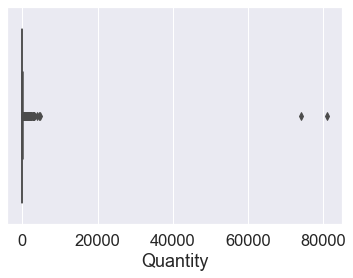

In [339]:
#Checking Quantity and UnitPrice after the cleaning process
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(cleanall['Quantity'])

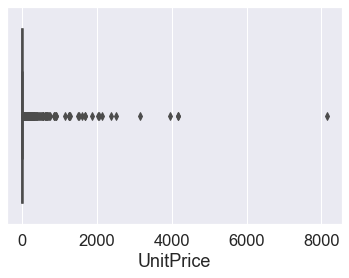

In [340]:
sns.boxplot(cleanall['UnitPrice'])

### Cleaning Duplicates

In [341]:
cleandd = cleanall.drop_duplicates()

In [342]:
cleandd

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [343]:
details = rstr(cleandd)
display(details.sort_values(by='missing ration', ascending=False))

Data shape: (392692, 8)
___________________________
Data types:
 object            4
float64           2
datetime64[ns]    1
int64             1
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing ration,uniques,skewness,kurtosis
Country,object,392692,37,0,0.0,"[[United Kingdom, France, Australia, Netherlan...",NaN,NaN
CustomerID,float64,392692,4338,0,0.0,"[[17850.0, 13047.0, 12583.0, 13748.0, 15100.0,...",0.030148,-1.180692
Description,object,392692,3877,0,0.0,"[[WHITE HANGING HEART T-LIGHT HOLDER, WHITE ME...",NaN,NaN
InvoiceDate,datetime64[ns],392692,17282,0,0.0,"[[2010-12-01 08:26:00, 2010-12-01 08:28:00, 20...",NaN,NaN
InvoiceNo,object,392692,18532,0,0.0,"[[536365, 536366, 536367, 536368, 536369, 5363...",-0.175439,-1.198838
Quantity,int64,392692,301,0,0.0,"[[6, 8, 2, 32, 3, 4, 24, 12, 48, 18, 20, 36, 8...",407.345663,175940.085113
StockCode,object,392692,3665,0,0.0,"[[85123A, 71053, 84406B, 84029G, 84029E, 22752...",NaN,NaN
UnitPrice,float64,392692,440,0,0.0,"[[2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 1.69, 2....",202.740861,57398.335042


Since the number of Description and StockCode does not match, we neet to investigate further

In [344]:
cleanddg = cleandd.groupby(["StockCode","Description"]).count().reset_index()

In [345]:
display(cleanddg.StockCode.value_counts()[cleanddg.StockCode.value_counts()>1].reset_index().head())

,index,StockCode
0,23196,4
1,23236,4
2,23203,3
3,22937,3
4,23413,3


In [346]:
cleanall[cleanall['StockCode'] == cleanddg.StockCode.value_counts()[cleanddg.StockCode.value_counts()>1]
      .reset_index()['index'][4]]['Description'].unique()

array(['VINTAGE COFFEE GRINDER BOX',
       'DECROTIVEVINTAGE COFFEE GRINDER BOX',
       'DECORATIVE VINTAGE COFFEE  BOX'], dtype=object)

Since there are spelling mistakes in Description, each of the spelling is considered unique value, hence we have more unique Description than unique StockCode

### Data Exploration - Looking at relationships between variables

In [347]:
#Changing data type for CustomerID from numeric to string
cleanall['CustomerID']= cleanall['CustomerID'].astype(str)

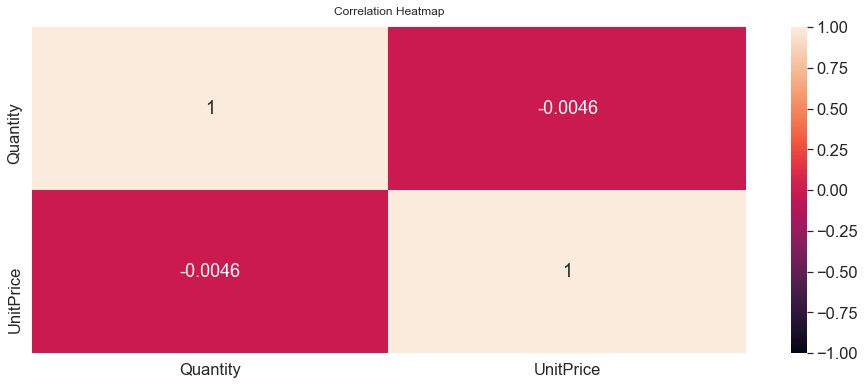

In [348]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(cleanall.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

There is low correlation between numerical variables (Quantity and UnitPrice)

In [349]:
#Looking at number of sales per country
cleanall['TransactionValue'] = cleanall['Quantity'] * cleanall['UnitPrice']

In [350]:
countrysales = pd.DataFrame(cleanall.groupby('Country')[['TransactionValue']].sum().sort_values('TransactionValue',ascending=False).reset_index())

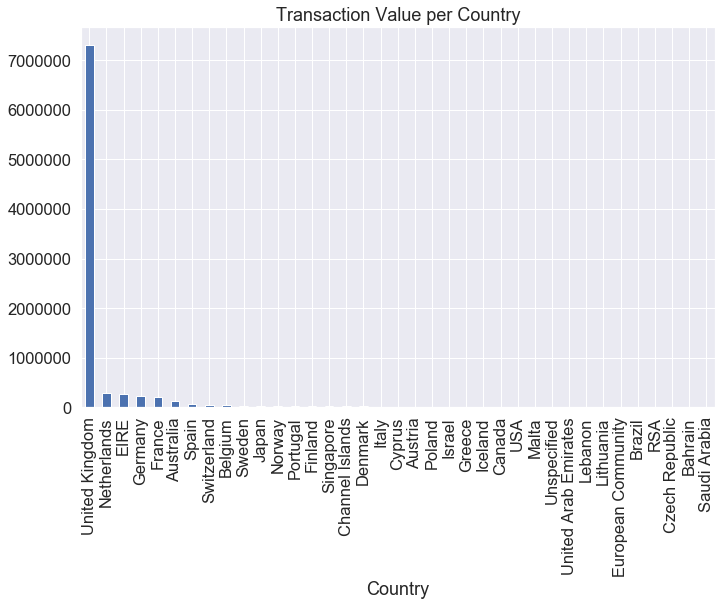

In [351]:
fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
g = cleanall.groupby(["Country"]).TransactionValue.sum().sort_values(ascending = False).plot(kind='bar', title='Transaction Value per Country')

From the bar graph above, we can see that a great deal of transaction happens in UK. It makes so much sense since the company is UK-based. Therefore, we can specifically select only customers from UK to be segmented. 

In [352]:
uk = cleanall[cleanall.Country == 'United Kingdom']

In [353]:
details = rstr(uk)
display(details.sort_values(by='missing ration', ascending=False))

Data shape: (354321, 9)
___________________________
Data types:
 object            5
float64           2
datetime64[ns]    1
int64             1
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing ration,uniques,skewness,kurtosis
Country,object,354321,1,0,0.0,"[[United Kingdom, France, Australia, Netherlan...",NaN,NaN
CustomerID,object,354321,3920,0,0.0,"[[17850.0, 13047.0, 12583.0, 13748.0, 15100.0,...",-0.007706,-1.208106
Description,object,354321,3844,0,0.0,"[[WHITE HANGING HEART T-LIGHT HOLDER, WHITE ME...",NaN,NaN
InvoiceDate,datetime64[ns],354321,15612,0,0.0,"[[2010-12-01 08:26:00, 2010-12-01 08:28:00, 20...",NaN,NaN
InvoiceNo,object,354321,16646,0,0.0,"[[536365, 536366, 536367, 536368, 536369, 5363...",-0.181941,-1.208160
Quantity,int64,354321,293,0,0.0,"[[6, 8, 2, 32, 3, 4, 24, 12, 48, 18, 20, 36, 8...",391.522988,161278.218860
StockCode,object,354321,3645,0,0.0,"[[85123A, 71053, 84406B, 84029G, 84029E, 22752...",NaN,NaN
TransactionValue,float64,354321,2792,0,0.0,NaN,431.792732,210515.865340
UnitPrice,float64,354321,402,0,0.0,"[[2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 1.69, 2....",307.319371,126987.274562


In [354]:
uk['TransactionValue'].describe()

count    354321.000000
mean         20.626470
std         326.044012
min           0.001000
25%           4.160000
50%          10.200000
75%          17.700000
max      168469.600000
Name: TransactionValue, dtype: float64

### Feature Engineering

There are various ways to do customer segmentation. We can do it based on purchasing behavior, demographic backgrounds, geographical location, and RFM (Recency, Frequency and Monetary). Using this data set, we can either use geographical location or RFM to do customer segmentation. We will utilise RFM approach since it will give deeper and more detailed insights than clustering using geographical location alone. The feture that we will need include InvoiceNo, InvoiceDate, CustomerID, and Transaction Value that we just generated.

#### Recency
To create the recency feature variable, we need to decide the reference date. The reference date is usually one day after the last transaction date. We can then construct the recency variable as the number of days before the reference date. To calculate recency, we will use the variable InvoiceDate

In [355]:
refdate = uk.InvoiceDate.max() + datetime.timedelta(days = 1)
print(refdate)

2011-12-10 12:49:00


In [356]:
uk['recency'] = (refdate - uk.InvoiceDate).astype('timedelta64[D]')
uk_cust_hist =  uk[['CustomerID', 'recency']].groupby('CustomerID').min().reset_index()
uk_cust_hist.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
recency,3920.0,92.208418,99.533854,1.0,18.0,51.0,143.0,374.0


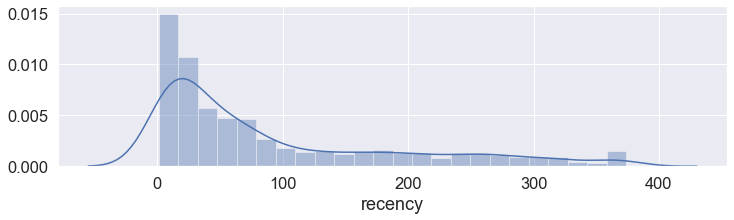

In [357]:
#Plotting Recency
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.distplot(uk_cust_hist['recency'])

We can see that the distribution of recency is positively-skewed. 

#### Frequency
Purchasing frequency for each customer (CustomerID) will be calculated using the variable InvoiceNo

In [358]:
uk_cust_freq = (uk[['CustomerID', 'InvoiceNo']].groupby(["CustomerID", 'InvoiceNo']).count().reset_index()).\
                groupby(["CustomerID"]).count().reset_index()
uk_cust_freq.rename(columns={'InvoiceNo':'frequency'},inplace=True)
uk_cust_hist = uk_cust_hist.merge(uk_cust_freq)

In [359]:
uk_cust_hist

,CustomerID,recency,frequency
0,12346.0,326.0,1
1,12747.0,2.0,11
2,12748.0,1.0,209
3,12749.0,4.0,5
4,12820.0,3.0,4
...,...,...,...
3915,18280.0,278.0,1
3916,18281.0,181.0,1
3917,18282.0,8.0,2
3918,18283.0,4.0,16


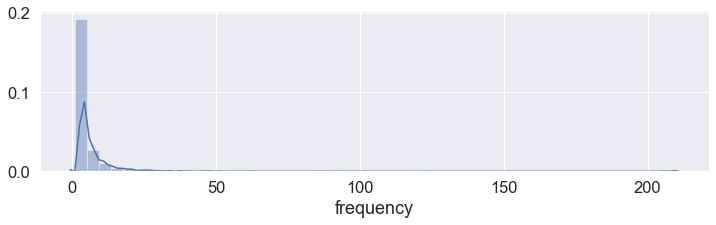

In [360]:
#Plotting Frequency
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.distplot(uk_cust_hist['frequency'])

The distribution of frequency is also positively-skewed

#### Monetary
We will use TransactionValue, which is calculated by multiplying Quantity and UnitPrice.

In [361]:
uk_cust_mon = (uk[['CustomerID', 'TransactionValue']].groupby(["CustomerID", 'TransactionValue'])\
               .sum().reset_index()).\
                groupby(["CustomerID"]).sum().reset_index()
uk_cust_mon.rename(columns={'TransactionValue':'monetary'},inplace=True)
uk_cust_hist = uk_cust_hist.merge(uk_cust_mon)

In [362]:
uk_cust_hist

,CustomerID,recency,frequency,monetary
0,12346.0,326.0,1,77183.60
1,12747.0,2.0,11,1998.31
2,12748.0,1.0,209,11534.84
3,12749.0,4.0,5,1428.57
4,12820.0,3.0,4,394.71
...,...,...,...,...
3915,18280.0,278.0,1,147.90
3916,18281.0,181.0,1,53.79
3917,18282.0,8.0,2,147.60
3918,18283.0,4.0,16,381.88


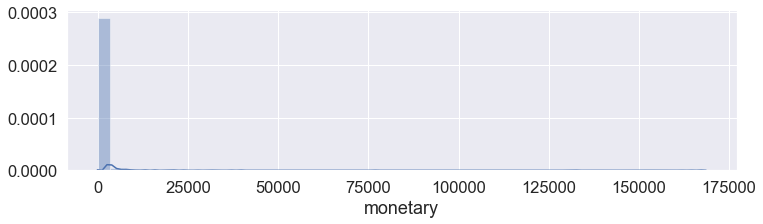

In [363]:
#Plotting Monetary Value
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.distplot(uk_cust_mon['monetary'])

The distribution of monetary is also positively-skewed

### Data Transformation

We will use K-means clustering to do customer segmentation. K-means clustering is one of the most simple, yet helpful clustering algorithms for large data sizes. In order to do K-means clustering, there are several assumptions that we need to fulfill:
A) The variables should be distributed symmetrically

B) Variables should have similar average values

C) Variables should have similar standard deviation values

Since the distributions of Recency, Frequency, and Monetary are not symmetrical, we need to log-transform the data. 

In [364]:
from sklearn.preprocessing import StandardScaler

uk_cust_hist['recency_log'] = uk_cust_hist['recency'].apply(math.log)
uk_cust_hist['frequency_log'] = uk_cust_hist['frequency'].apply(math.log)
uk_cust_hist['monetary_log'] = uk_cust_hist['monetary'].apply(math.log)
feature_vector = ['monetary_log', 'recency_log','frequency_log']
X_subset = uk_cust_hist[feature_vector]
scaler = StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)
pd.DataFrame(X_scaled, columns=X_subset.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
monetary_log,3920.0,2.545016e-16,1.000128,-4.388700,-0.660933,-0.024458,0.617762,5.623945
recency_log,3920.0,3.412487e-16,1.000128,-2.625681,-0.609422,0.117073,0.836289,1.506948
frequency_log,3920.0,-2.181645e-16,1.000128,-1.050247,-1.050247,-0.280309,0.737495,4.883947


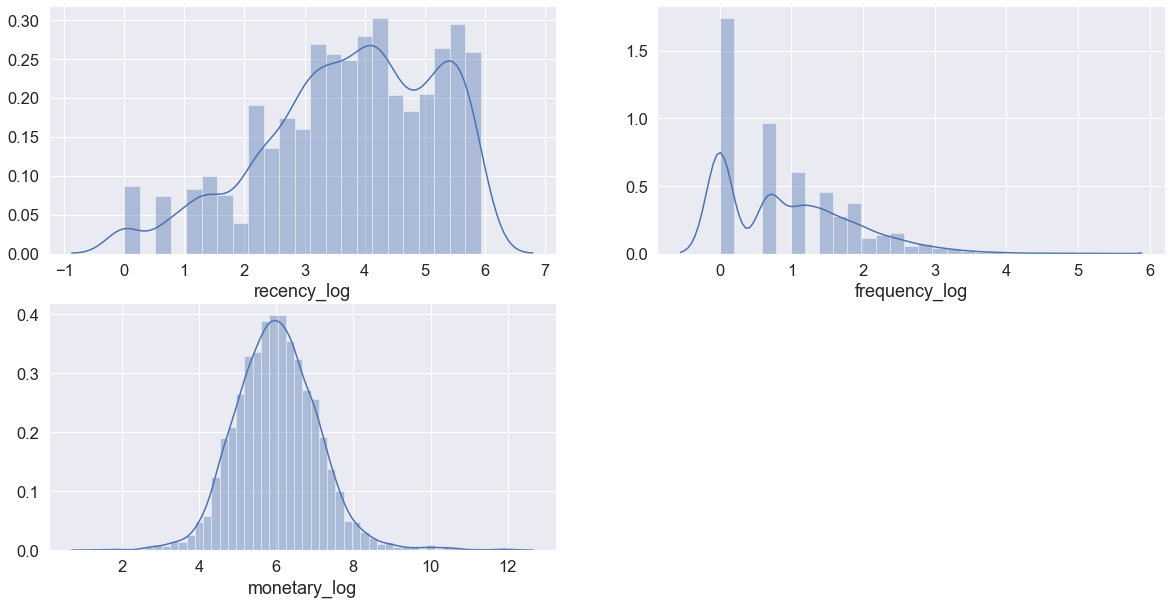

In [365]:
#Checking the distribution after transformation
fig = plt.figure(figsize=(20,10))

f1 = fig.add_subplot(221); sns.distplot(uk_cust_hist['recency_log'])
f1 = fig.add_subplot(222); sns.distplot(uk_cust_hist['frequency_log'])
f1 = fig.add_subplot(223); sns.distplot(uk_cust_hist['monetary_log'])

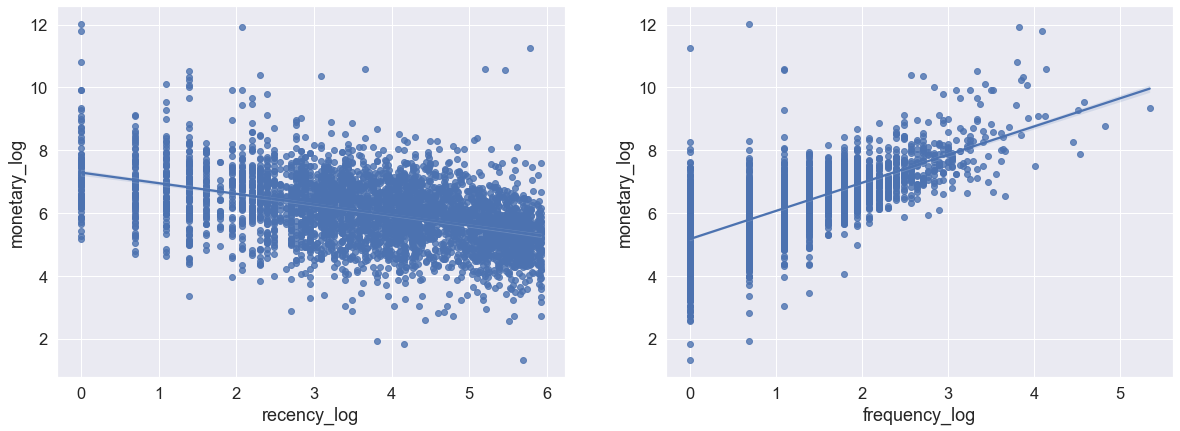

In [366]:
fig = plt.figure(figsize=(20,15))
f1 = fig.add_subplot(223); sns.regplot(x='recency_log', y='monetary_log', data=uk_cust_hist)
f1 = fig.add_subplot(224); sns.regplot(x='frequency_log', y='monetary_log', data=uk_cust_hist)

plt.show()

Using the log-transformed data, we can see that costumers who buy with a higher frequency tend to spend more. Meanwhile, customers who have higher recency tend to spend less. 

# Model Development using K-Means Clustering

#### Finding the desired number of clusters

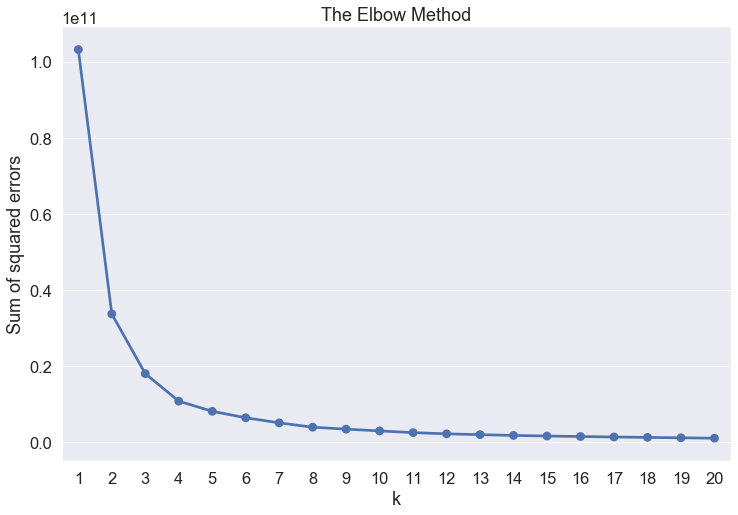

In [367]:
#using Elbow Plot

from sklearn.cluster import KMeans
sse = {}
# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(uk_cust_hist)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_
# Plotting the elbow plot
plt.figure(figsize=(12,8))
plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

Based on the Elbow Plot, we can see the optimal number of clusters is between 3-8. We can start silhouette analysis to determine the optimal number. 

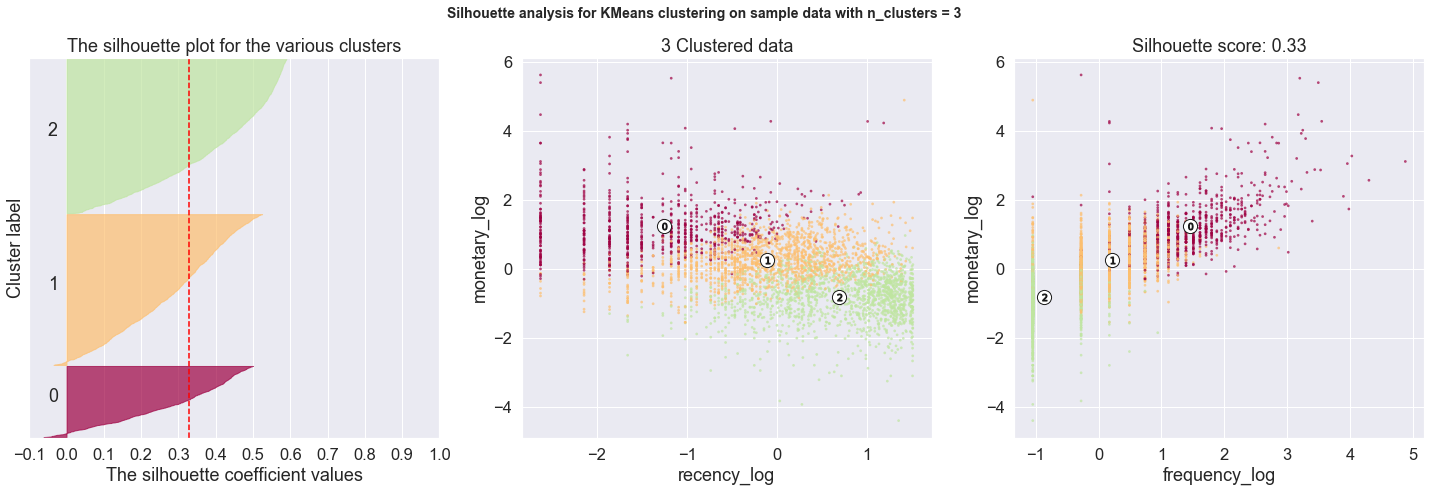

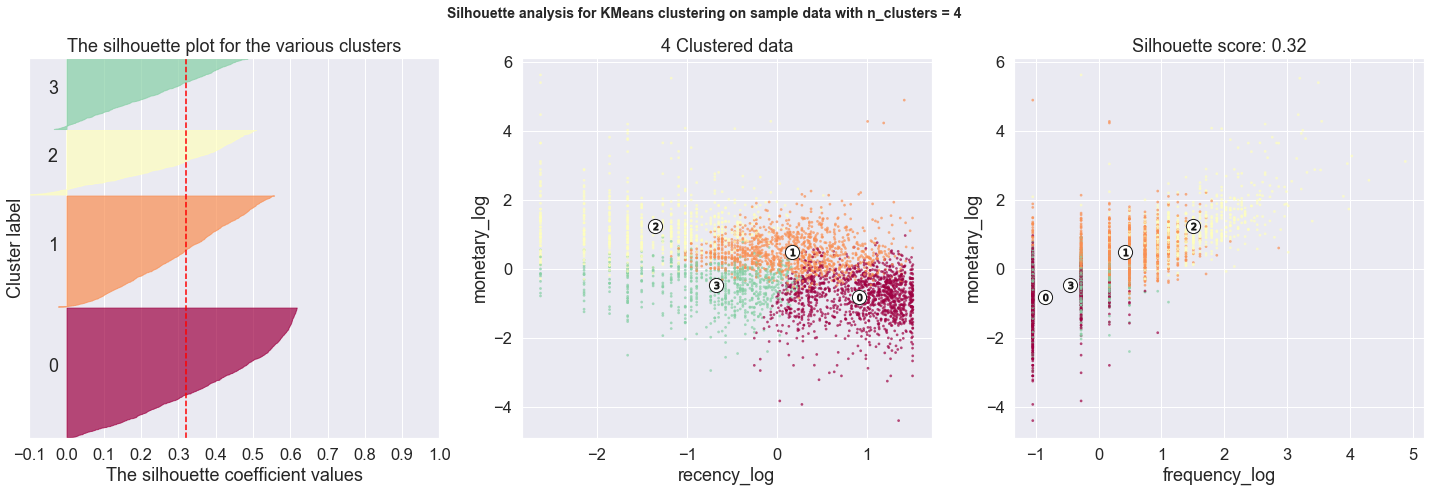

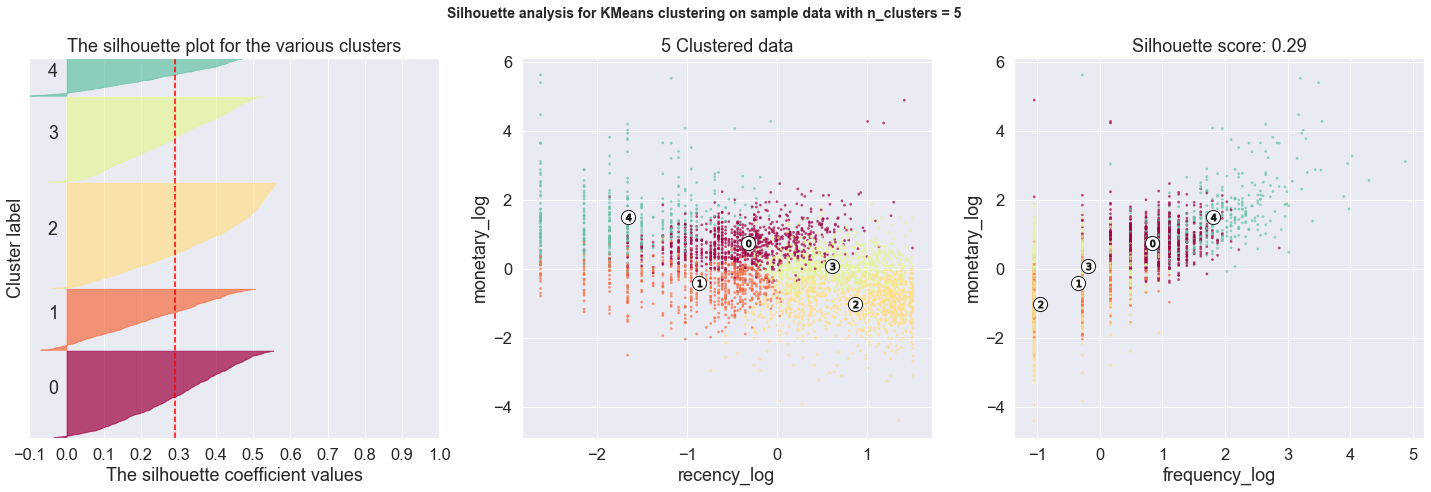

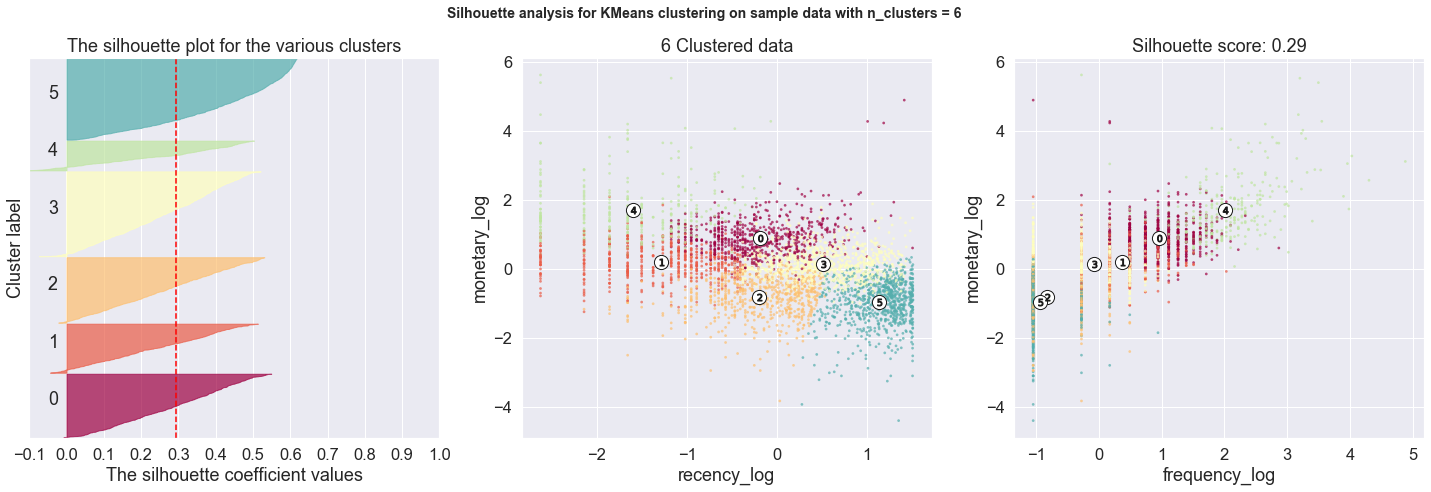

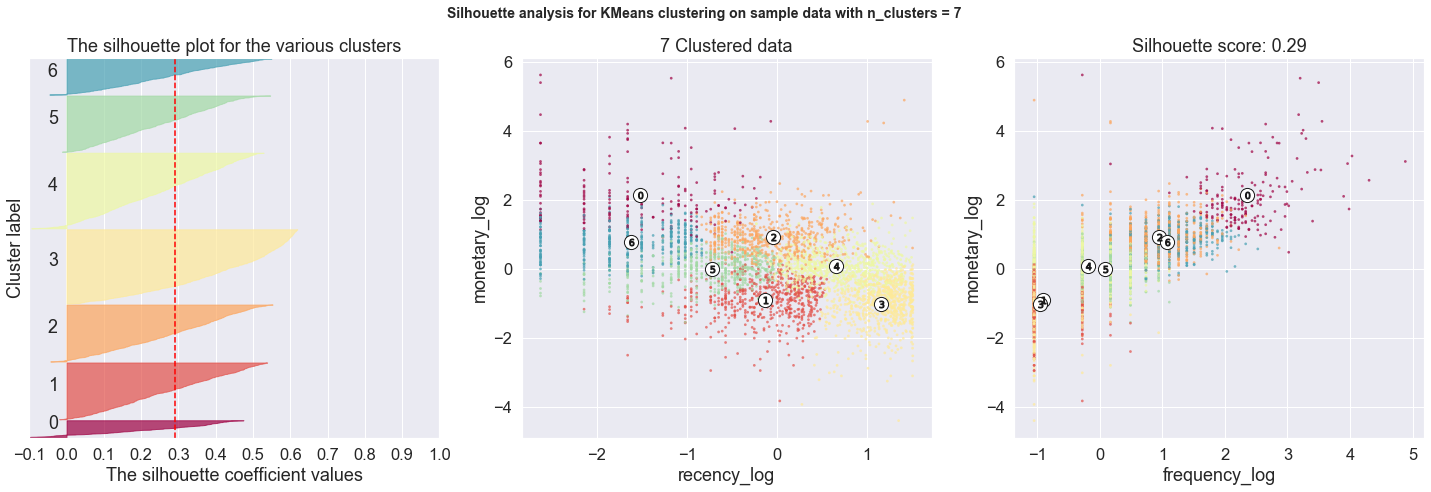

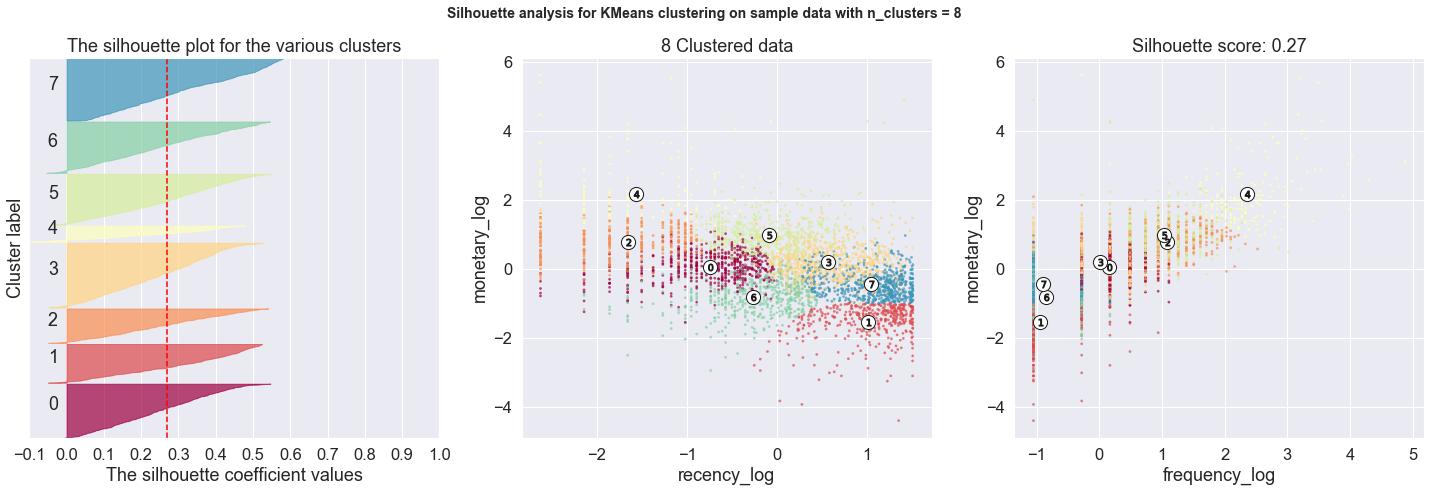

In [368]:
#Silhouette Analysis
cluster_centers = dict()

range_n_clusters = [3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(25, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
    cluster_labels = clusterer.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X = X_scaled, labels = cluster_labels)
    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X = X_scaled, labels = cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    
    centers = clusterer.cluster_centers_
    y = 0
    x = 1
    ax2.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("{} Clustered data".format(n_clusters))
    ax2.set_xlabel(feature_vector[x])
    ax2.set_ylabel(feature_vector[y])

    x = 2
    ax3.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))
    ax3.set_xlabel(feature_vector[x])
    ax3.set_ylabel(feature_vector[y])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

Based on Silhouette Analysis, we will use n_clusters=3 since it has the highest Silhouette Score. We can also see from the visualization that the 3-clusters demonstrate stark differences among clusters in terms of recency, frequency, and monetary. 

#### K-Means Clustering

In [370]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(uk_cust_hist)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [371]:
kmeans.labels_

array([2, 0, 0, ..., 0, 0, 0], dtype=int32)

In [372]:
# assign the label
uk_cust_hist['ClusterID'] = kmeans.labels_
uk_cust_hist.sort_values(by='monetary', ascending=True)

,CustomerID,recency,frequency,monetary,recency_log,frequency_log,monetary_log,ClusterID
2807,16738.0,298.0,1,3.75,5.697093,0.000000,1.321756,0
1398,14792.0,64.0,1,6.20,4.158883,0.000000,1.824549,0
2604,16454.0,45.0,2,6.90,3.806662,0.693147,1.931521,0
3680,17956.0,249.0,1,12.75,5.517453,0.000000,2.545531,0
2913,16878.0,84.0,1,13.30,4.430817,0.000000,2.587764,0
...,...,...,...,...,...,...,...,...
3675,17949.0,1.0,45,49213.90,0.000000,3.806662,10.803931,2
0,12346.0,326.0,1,77183.60,5.786897,0.000000,11.253942,2
3783,18102.0,1.0,60,132734.98,0.000000,4.094345,11.796110,1
3314,17450.0,8.0,46,152259.75,2.079442,3.828641,11.933343,1


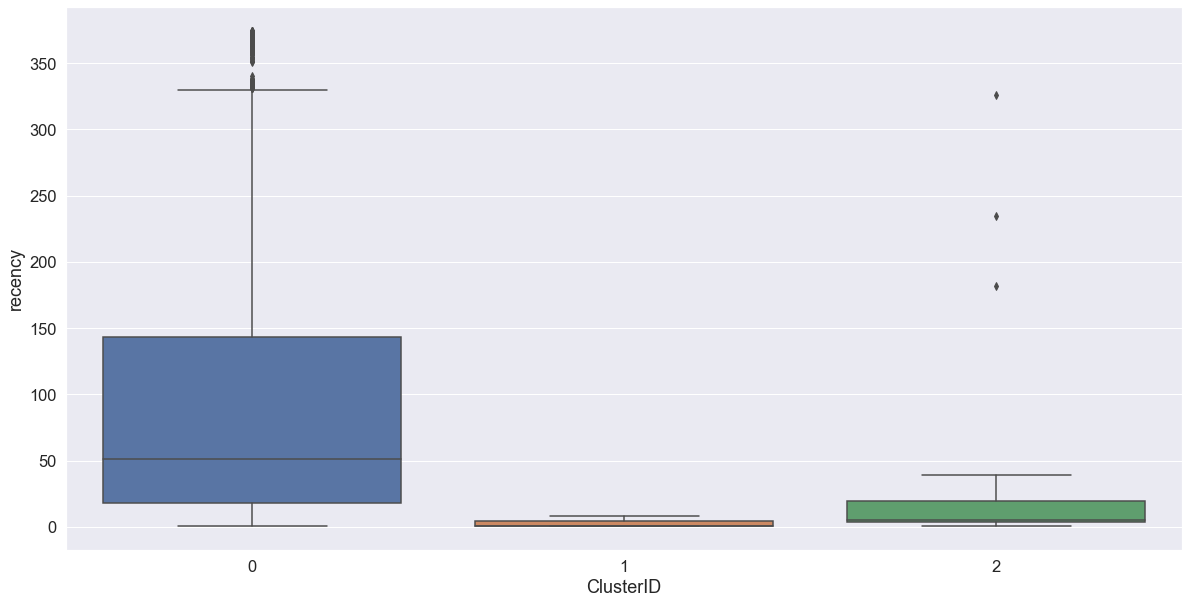

In [380]:
#Visualize boxplot recency per cluster
plt.figure(figsize=(20,10))
sns.boxplot(x='ClusterID', y='recency', data=uk_cust_hist)

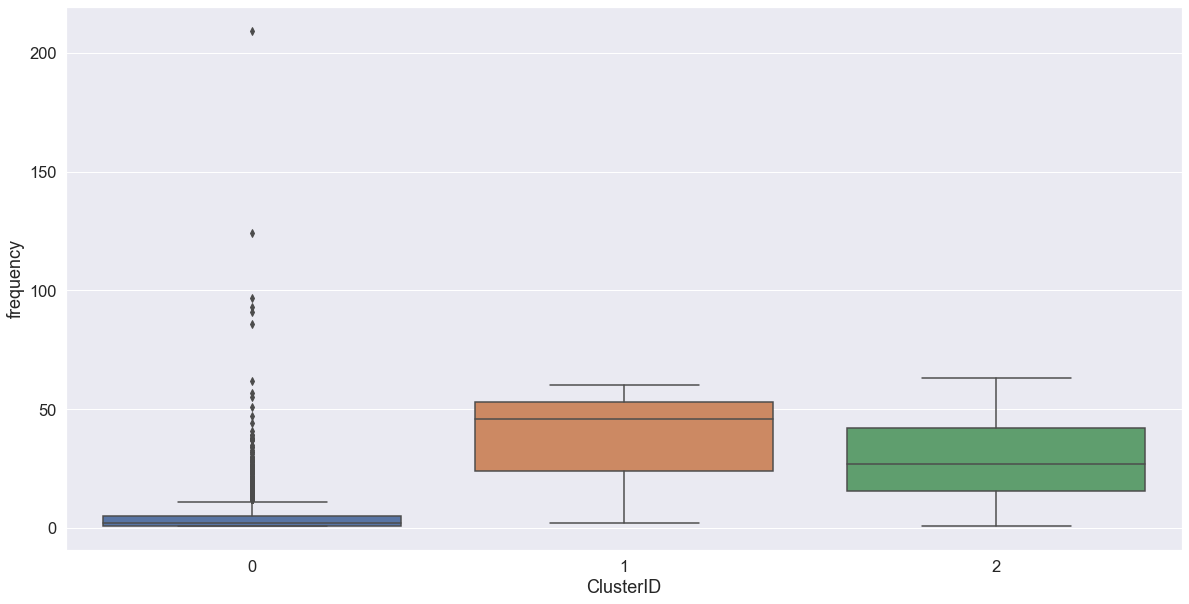

In [381]:
#Visualize boxplot frequency per cluster
plt.figure(figsize=(20,10))
sns.boxplot(x='ClusterID', y='frequency', data=uk_cust_hist)

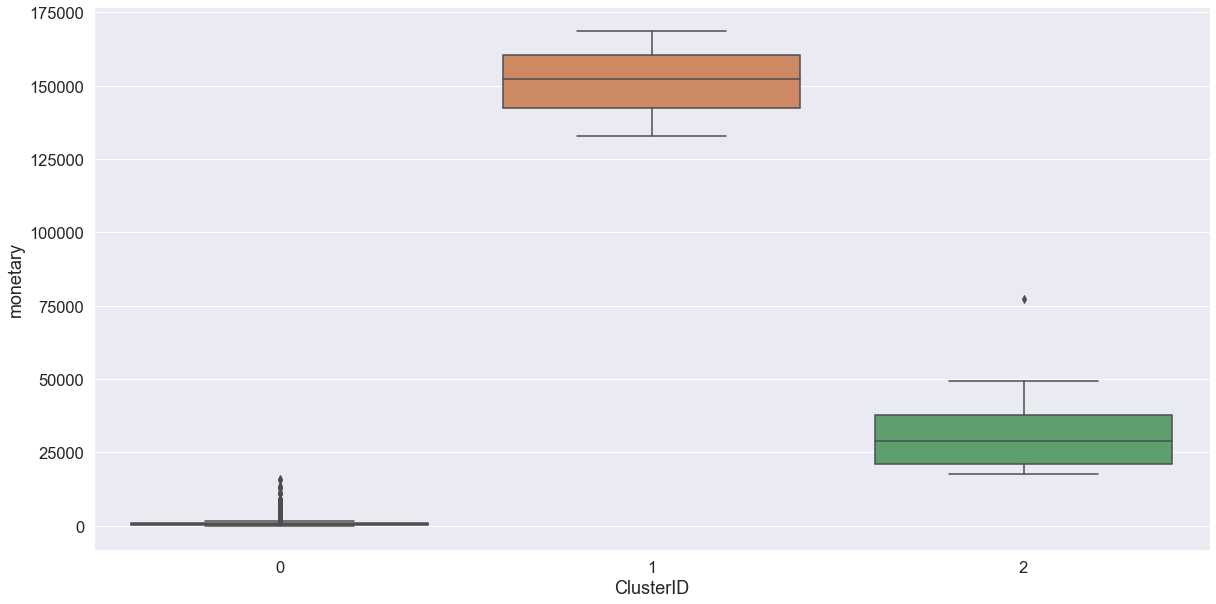

In [382]:
#Visualize boxplot monetary per cluster
plt.figure(figsize=(20,10))
sns.boxplot(x='ClusterID', y='monetary', data=uk_cust_hist)

In [383]:
# cluster centers
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[1.55616622e+04, 9.24803796e+01, 4.11387535e+00, 6.87406882e+02,
        3.77348779e+00, 9.34795983e-01, 5.99304921e+00],
       [1.73326667e+04, 3.33333333e+00, 3.60000000e+01, 1.51155743e+05,
        6.93147181e-01, 2.87204438e+00, 1.19213269e+01],
       [1.53530556e+04, 4.81111111e+01, 2.76666667e+01, 3.18440211e+04,
        2.22005610e+00, 2.94273578e+00, 1.02933899e+01]])

From the visualizations above, we can see that cluster 0 are the most recent users. Cluster 0 also purchases least often and spent the least amount of money. Cluster 1, however, are not recent users. Cluster 1 purchases most frequently and spends the most amount of money. The company can therefore start designing targeted campaigns for UK customers in Cluster 0 to increase their purchasing frequency and amount. The company can also provide promos or other benefits for UK customers in Cluster 1 and 2 to keep them purchasing a lot and frequently. 

# Model Evaluation

#### Using Davies-Boudlin's Index

In [393]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(X, kmeans.labels_)

0.3180121076822388

Small DBI indicates good model